In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# python3.5 environment 

In [56]:
# tensorflow 初始化环境变量
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[3.0]])
y=tf.matmul(w,x)

init_op=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(y.eval)
print(x)
print(y)

<bound method Tensor.eval of <tf.Tensor 'MatMul_7:0' shape=(1, 1) dtype=float32>>
<tf.Variable 'Variable_15:0' shape=(2, 1) dtype=float32_ref>
Tensor("MatMul_7:0", shape=(1, 1), dtype=float32)


In [57]:
# 构建数字对象

tensor=tf.constant([1,2,3,4,5,6,7,]) # [1,2,3,4,5,6,7]
tensor=tf.constant(-1.0,shape=[2,3]) # [[-1.,-1.,-1.],[-1.,-1.,-1.]]
tf.linspace(10.0,12.0,3,name="linspace") # [ 10.0 11.0 12.0]
start=3
limit=18
delta=3
tf.range(start,limit,delta)


<tf.Tensor 'range_4:0' shape=(5,) dtype=int32>

In [58]:
# 随机数
nrm=tf.random_normal([2,3],mean=-1,stddev=4)

c=tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)
sess=tf.Session()
print(sess.run(nrm))
print(sess.run(shuff))


[[-3.91113281 -0.75456893 -3.8479445 ]
 [-2.28838253 -0.0696016   3.72664499]]
[[1 2]
 [5 6]
 [3 4]]


In [59]:
arr=np.zeros((3,3))
tarr=tf.convert_to_tensor(arr)
with tf.Session() as sess:
    print(sess.run(tarr))


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


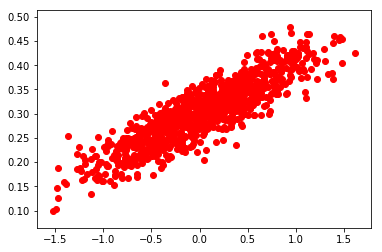

In [61]:
# 随机生成1000 个点，围绕在 y=0.1x+0.3的直线周围，生成样本数据
num_points=1000
vectors_set=[]
for i in range(num_points):
    x=np.random.normal(0.0,0.55)
    y=x*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x,y])
# 生成一些样本
x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c='r')
plt.show()


In [73]:
# 通过
# 生成1维的w矩阵，取值是 [-1,1]之间的随机数
w=tf.Variable(tf.random_uniform([1],-1.0,1.0),name='W')
# 生成1维的b矩阵，初始值是0
b=tf.Variable(tf.zeros([1],name='b'))
# 经过计算得出预估值 y
y=w*x_data+b
# 以估计值 y和实际值 y_data之间的均方差作为损失
loss =tf.reduce_mean(tf.square(y-y_data),name='loss')
# 采用梯度下降法来优化参数
optimizer=tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train=optimizer.minimize(loss,name='train')

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
print('w=',sess.run(w),'b=',sess.run(b),'loss=',sess.run(loss))
# 执行20次训练
for step in range(200):
    sess.run(train)
    # 输出训练好的 w和b
    print('w=',sess.run(w),'b=',sess.run(b),'loss=',sess.run(loss))
writer=tf.train.SummarySaverHook(sess.graph,scaffold=tf.train.Scaffold(summary_op=tf.summary.merge_all()))


w= [ 0.35214806] b= [ 0.] loss= 0.109159
w= [ 0.27600911] b= [ 0.29621515] loss= 0.0109077
w= [ 0.21927287] b= [ 0.29753482] loss= 0.0055027
w= [ 0.1807979] b= [ 0.29851821] loss= 0.00301684
w= [ 0.15470505] b= [ 0.2991851] loss= 0.00187353
w= [ 0.13700947] b= [ 0.29963738] loss= 0.00134769
w= [ 0.12500873] b= [ 0.29994407] loss= 0.00110584
w= [ 0.11687011] b= [ 0.30015209] loss= 0.000994613
w= [ 0.11135068] b= [ 0.30029315] loss= 0.000943456
w= [ 0.10760753] b= [ 0.30038881] loss= 0.000919927
w= [ 0.105069] b= [ 0.30045369] loss= 0.000909106
w= [ 0.10334744] b= [ 0.30049771] loss= 0.000904129
w= [ 0.10217991] b= [ 0.30052754] loss= 0.00090184
w= [ 0.10138812] b= [ 0.30054778] loss= 0.000900787
w= [ 0.10085115] b= [ 0.30056149] loss= 0.000900303
w= [ 0.10048699] b= [ 0.30057082] loss= 0.00090008
w= [ 0.10024001] b= [ 0.30057713] loss= 0.000899978
w= [ 0.10007253] b= [ 0.3005814] loss= 0.000899931
w= [ 0.09995894] b= [ 0.30058432] loss= 0.000899909
w= [ 0.09988191] b= [ 0.30058628] loss